# COVID-19-2020426
## 20대가 왜 높을까

In [21]:
import numpy as np 
import pandas as pd
import os
import glob
import re
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import animation, rc
import geopandas as gpd
from shapely.geometry import Point, Polygon, LineString
import plotly.express as px
import folium
from folium import plugins
import branca
import json
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.io as pio
import matplotlib.pylab as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime, timedelta

pio.renderers.default = "notebook_connected"

In [22]:
files = glob.glob('dataset/*.csv')
data = []
for i in files :
    i = re.sub("dataset\\\\", "", i)
    data.append(re.sub(".csv","",i))
for i in range(len(files)) :
    globals()[data[i]] = pd.read_csv(files[i])
data

['Case',
 'PatientInfo',
 'PatientRoute',
 'Policy',
 'Region',
 'SearchTrend',
 'SeoulFloating',
 'Time',
 'TimeAge',
 'TimeGender',
 'TimeProvince',
 'Weather']

In [178]:
os.getcwd()
os.chdir('C:\\Users\\Danah\\Documents\\GitHub\\Data-Science-for-COVID-19\\external_dataset\\')

In [179]:
kor_age = pd.read_csv('202003_202003_연령별인구현황_월간.csv',  engine='python')
kor_age

,행정구역,2020년03월_계_총인구수,2020년03월_계_연령구간인구수,2020년03월_계_0~9세,2020년03월_계_10~19세,2020년03월_계_20~29세,2020년03월_계_30~39세,2020년03월_계_40~49세,2020년03월_계_50~59세,2020년03월_계_60~69세,...,2020년03월_여_10~19세,2020년03월_여_20~29세,2020년03월_여_30~39세,2020년03월_여_40~49세,2020년03월_여_50~59세,2020년03월_여_60~69세,2020년03월_여_70~79세,2020년03월_여_80~89세,2020년03월_여_90~99세,2020년03월_여_100세 이상
0,전국 (0000000000),"51,843,195","51,843,195","4,119,475","4,902,009","6,799,238","7,006,749","8,375,429","8,662,400","6,426,006",...,"2,363,499","3,226,225","3,402,741","4,118,912","4,294,650","3,284,431","1,999,537","1,087,194","185,291","15,734"
1,서울특별시 (1100000000),"9,733,655","9,733,655","655,134","810,349","1,461,212","1,501,662","1,558,128","1,537,114","1,205,699",...,"394,621","747,986","750,525","785,988","783,035","635,954","375,916","163,851","30,137","4,760"
2,부산광역시 (2600000000),"3,409,932","3,409,932","240,857","279,909","435,280","430,494","516,889","579,584","513,485",...,"134,970","207,749","210,513","256,949","298,829","269,746","157,789","71,038","11,372","1,419"
3,대구광역시 (2700000000),"2,433,568","2,433,568","185,945","233,311","322,594","302,617","390,628","428,955","313,213",...,"111,101","149,427","146,022","197,898","218,897","163,966","97,154","48,692","6,953",536
4,인천광역시 (2800000000),"2,952,689","2,952,689","238,763","279,780","405,826","416,119","489,213","515,257","347,493",...,"135,785","193,922","201,193","239,366","257,522","175,174","94,487","49,327","9,120",672
5,광주광역시 (2900000000),"1,455,705","1,455,705","124,957","162,130","207,787","190,641","244,621","234,045","156,074",...,"77,870","99,300","93,655","123,207","118,102","81,738","50,856","24,978","4,385",358
6,대전광역시 (3000000000),"1,471,858","1,471,858","119,952","151,192","212,258","198,404","241,550","242,974","171,435",...,"72,871","100,582","95,354","121,077","122,048","87,970","48,570","25,343","4,322",259
7,울산광역시 (3100000000),"1,144,563","1,144,563","102,979","115,019","147,434","157,548","190,195","211,169","137,496",...,"54,320","64,830","74,227","93,592","103,475","68,031","30,532","14,784","2,525",128
8,세종특별자치시 (3600000000),"344,792","344,792","47,449","40,751","36,373","61,396","65,983","43,132","28,002",...,"20,292","17,972","31,502","32,082","20,804","14,108","7,444","4,582",845,47
9,경기도 (4100000000),"13,288,975","13,288,975","1,175,669","1,344,847","1,779,533","1,916,550","2,296,447","2,208,632","1,435,865",...,"652,379","844,001","931,351","1,130,045","1,088,466","722,837","408,315","213,123","37,415","2,971"


In [180]:
kor_age=kor_age.set_index(kor_age['행정구역'])
kor_age=kor_age.drop('행정구역', axis=1)

In [181]:
kor_age.index

Index(['전국  (0000000000)', '서울특별시  (1100000000)', '부산광역시  (2600000000)',
       '대구광역시  (2700000000)', '인천광역시  (2800000000)', '광주광역시  (2900000000)',
       '대전광역시  (3000000000)', '울산광역시  (3100000000)', '세종특별자치시  (3600000000)',
       '경기도  (4100000000)', '강원도  (4200000000)', '충청북도  (4300000000)',
       '충청남도  (4400000000)', '전라북도  (4500000000)', '전라남도  (4600000000)',
       '경상북도  (4700000000)', '경상남도  (4800000000)', '제주특별자치도  (5000000000)'],
      dtype='object', name='행정구역')

In [182]:
kor_age[['2020년03월_계_20~29세','2020년03월_계_30~39세','2020년03월_계_40~49세','2020년03월_계_50~59세']]

,2020년03월_계_20~29세,2020년03월_계_30~39세,2020년03월_계_40~49세,2020년03월_계_50~59세
행정구역,,,,
전국 (0000000000),"6,799,238","7,006,749","8,375,429","8,662,400"
서울특별시 (1100000000),"1,461,212","1,501,662","1,558,128","1,537,114"
부산광역시 (2600000000),"435,280","430,494","516,889","579,584"
대구광역시 (2700000000),"322,594","302,617","390,628","428,955"
인천광역시 (2800000000),"405,826","416,119","489,213","515,257"
광주광역시 (2900000000),"207,787","190,641","244,621","234,045"
대전광역시 (3000000000),"212,258","198,404","241,550","242,974"
울산광역시 (3100000000),"147,434","157,548","190,195","211,169"
세종특별자치시 (3600000000),"36,373","61,396","65,983","43,132"


In [153]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]]
                    ,subplot_titles=["kindergarten", "Elementary", "University", "Nursing Home"])
fig.add_trace(go.Pie(labels=kor_age.index, values=kor_age['2020년03월_계_20~29세'], name="kindergarten count"),
              1, 1)
fig.add_trace(go.Pie(labels=kor_age.index, values=kor_age['2020년03월_계_30~39세'], name="Elementary School count"),
              1, 2)
fig.add_trace(go.Pie(labels=kor_age.index, values=kor_age['2020년03월_계_40~49세'], name="University count"),
              2, 1)
fig.add_trace(go.Pie(labels=kor_age.index, values=kor_age['2020년03월_계_50~59세'], name="Nursing Home count"),
              2, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Region Information")
fig.show()

In [12]:
TimeAge.head()

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1


In [189]:
# 3월 2일 ~ 4월 20일
TimeAge[(TimeAge.age=='20s')]

,date,time,age,confirmed,deceased
2,2020-03-02,0,20s,1235,0
11,2020-03-03,0,20s,1417,0
20,2020-03-04,0,20s,1575,0
29,2020-03-05,0,20s,1727,0
38,2020-03-06,0,20s,1877,0
47,2020-03-07,0,20s,2038,0
56,2020-03-08,0,20s,2133,0
65,2020-03-09,0,20s,2190,0
74,2020-03-10,0,20s,2213,0
83,2020-03-11,0,20s,2238,0


In [15]:
Region.head()

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080


In [26]:
def pie_chart(data, col, title = ''):
    cnt_df = data[col].value_counts().reset_index()
    fig = px.pie(cnt_df, 
                 values = col, 
                 names = 'index', 
                 title = title, 
                 template = 'seaborn',
                 color_discrete_sequence=px.colors.sequential.RdBu)
    fig.update_traces(rotation=90, pull=0.05, textinfo="value+percent+label")
    fig.show()

In [172]:
PatientInfo.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [186]:
PatientInfo.tail()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
3321,7000000009,9651.0,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,14.0,NaN,2020-03-29,NaN,NaN,isolated
3322,7000000010,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18.0,NaN,2020-04-03,NaN,NaN,isolated
3323,7000000011,NaN,male,NaN,30s,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7.000000e+09,5.0,NaN,2020-04-03,NaN,NaN,isolated
3324,7000000012,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9.0,NaN,2020-04-03,NaN,NaN,isolated
3325,7000000013,NaN,female,NaN,10s,China,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,6.0,NaN,2020-04-14,NaN,NaN,isolated


In [183]:
len(PatientInfo)

3326

In [176]:
print(len(PatientInfo[(PatientInfo.age=='20s')]))
print(len(PatientInfo[(PatientInfo.age=='30s')]))
print(len(PatientInfo[(PatientInfo.age=='40s')]))
print(len(PatientInfo[(PatientInfo.age=='50s')]))

790
425
453
589


In [28]:
pie_chart(PatientInfo[(PatientInfo.age=='20s')], 'infection_case', title = 'infection case of 20s')

In [34]:
pie_chart(PatientInfo[(PatientInfo.age=='30s')], 'infection_case', title = 'infection case of 30s')

In [35]:
pie_chart(PatientInfo[(PatientInfo.age=='40s')], 'infection_case', title = 'infection case of 40s')

In [36]:
pie_chart(PatientInfo[(PatientInfo.age=='50s')], 'infection_case', title = 'infection case of 50s')

In [37]:
pie_chart(PatientInfo[(PatientInfo.age=='60s')], 'infection_case', title = 'infection case of 60s')

20대의 확진이 많은 이유는 해외 유입 때문임

In [166]:
os.chdir('C:\\Users\\Danah\\Documents\\GitHub\\Data-Science-for-COVID-19\\external_dataset\\')
COVID = pd.read_csv('newstitle_COVID.txt', sep='\t')
harujongil = pd.read_csv('newstitle_harujongil.txt', sep='\t')
corona = pd.read_csv('newstitle_corona.txt', sep='\t')
society = pd.read_csv('newstitle_society.txt', sep='\t')

In [167]:
import requests as req
from bs4 import BeautifulSoup as bs
import os
from selenium import webdriver
import pandas as pd
from html_table_parser import parser_functions as parser
import numpy as np
import csv
from konlpy.tag import Twitter #명사를 분리 추출하기 위해 한국어 형태소 분석기
from konlpy.tag import Okt
from collections import Counter
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
okt = Okt()


################ Tokenizer ################

def tokenizer_okt_pos(doc):
    return okt.pos(doc)

def tokenizer_twitter_pos(doc):
    return twitter.pos(doc, norm=True, stem=True)

def imp_tokken(sentence):
    noun_adj_list = []
    for word, tag in sentence:
        if tag in ['Noun','Adjective']:
            noun_adj_list.append(word)
    return noun_adj_list

def list_appending(lists):
    list_append=[]
    for d in lists :
        for a in d:
            list_append.append(a)
    return list_append


In [168]:
society['title_tokken'] = society['title'].apply(tokenizer_okt_pos)
society['title_imp_tokken'] = society['title_tokken'].apply(imp_tokken)
society.head()

,date,title,title_tokken,title_imp_tokken
0,2020.01.01,[],"[([], Punctuation)]",[]
1,2020.01.02,['2019 현실과 이상 사이에서'],"[([', Punctuation), (2019, Number), (현실, Noun)...","[현실, 이상, 사이]"
2,2020.01.03,['이 시대의 독법-팔리는 문학에 대한 고찰 [신춘문예 - 문학평론]'],"[([', Punctuation), (이, Noun), (시대, Noun), (의,...","[이, 시대, 독법, 문학, 대한, 고찰, 신춘문예, 문학평론]"
3,2020.01.04,"[""[박진영의 사회심리학] 애정과 열정이 '지나쳐도' 번아웃 온다""]","[([""[, Punctuation), (박진영, Noun), (의, Josa), (...","[박진영, 사회, 심리학, 애정, 열정, 번, 아웃]"
4,2020.01.05,[],"[([], Punctuation)]",[]


In [169]:
count = Counter(list_appending(society['title_imp_tokken']))
title_count = dict(count.most_common())
title_count

{'거리': 4099,
 '두기': 3884,
 '사회': 3568,
 '코로나': 1090,
 '동참': 418,
 '명': 332,
 '연장': 260,
 '캠페인': 258,
 '방역': 236,
 '확산': 231,
 '강도': 231,
 '확': 224,
 '진자': 222,
 '실천': 218,
 '감염': 214,
 '정부': 212,
 '주': 153,
 '등': 137,
 '종합': 129,
 '마스크': 129,
 '강화': 126,
 '확진': 119,
 '더': 115,
 '대구': 114,
 '주말': 113,
 '중': 113,
 '생활': 96,
 '현장': 95,
 '점검': 93,
 '대응': 90,
 '집단': 89,
 '시설': 89,
 '신천지': 87,
 '당부': 86,
 '호소': 86,
 '적극': 82,
 '예배': 82,
 '교회': 81,
 '온라인': 81,
 '권고': 80,
 '개학': 80,
 '시민': 80,
 '로': 79,
 '서울': 78,
 '지역': 76,
 '시행': 73,
 '예방': 71,
 '영상': 71,
 '자제': 70,
 '필요': 68,
 '학원': 68,
 '운동': 68,
 '벚꽃': 68,
 '종교': 66,
 '위해': 65,
 '재택근무': 65,
 '콜센터': 65,
 '차단': 64,
 '원': 64,
 '포토': 64,
 '투표': 63,
 '총리': 62,
 '속': 61,
 '극복': 61,
 '지원': 60,
 '마음': 59,
 '환자': 59,
 '속보': 58,
 '지속': 58,
 '서울시': 57,
 '효과': 56,
 '회의': 55,
 '위': 55,
 '연기': 55,
 '국내': 54,
 '전환': 54,
 '추진': 54,
 '격리': 52,
 '공원': 52,
 '박원순': 51,
 '곳': 51,
 '발생': 51,
 '당국': 51,
 '추가': 51,
 '운영': 50,
 '대책': 50,
 '실시': 50,
 '질': 49,
 '우려

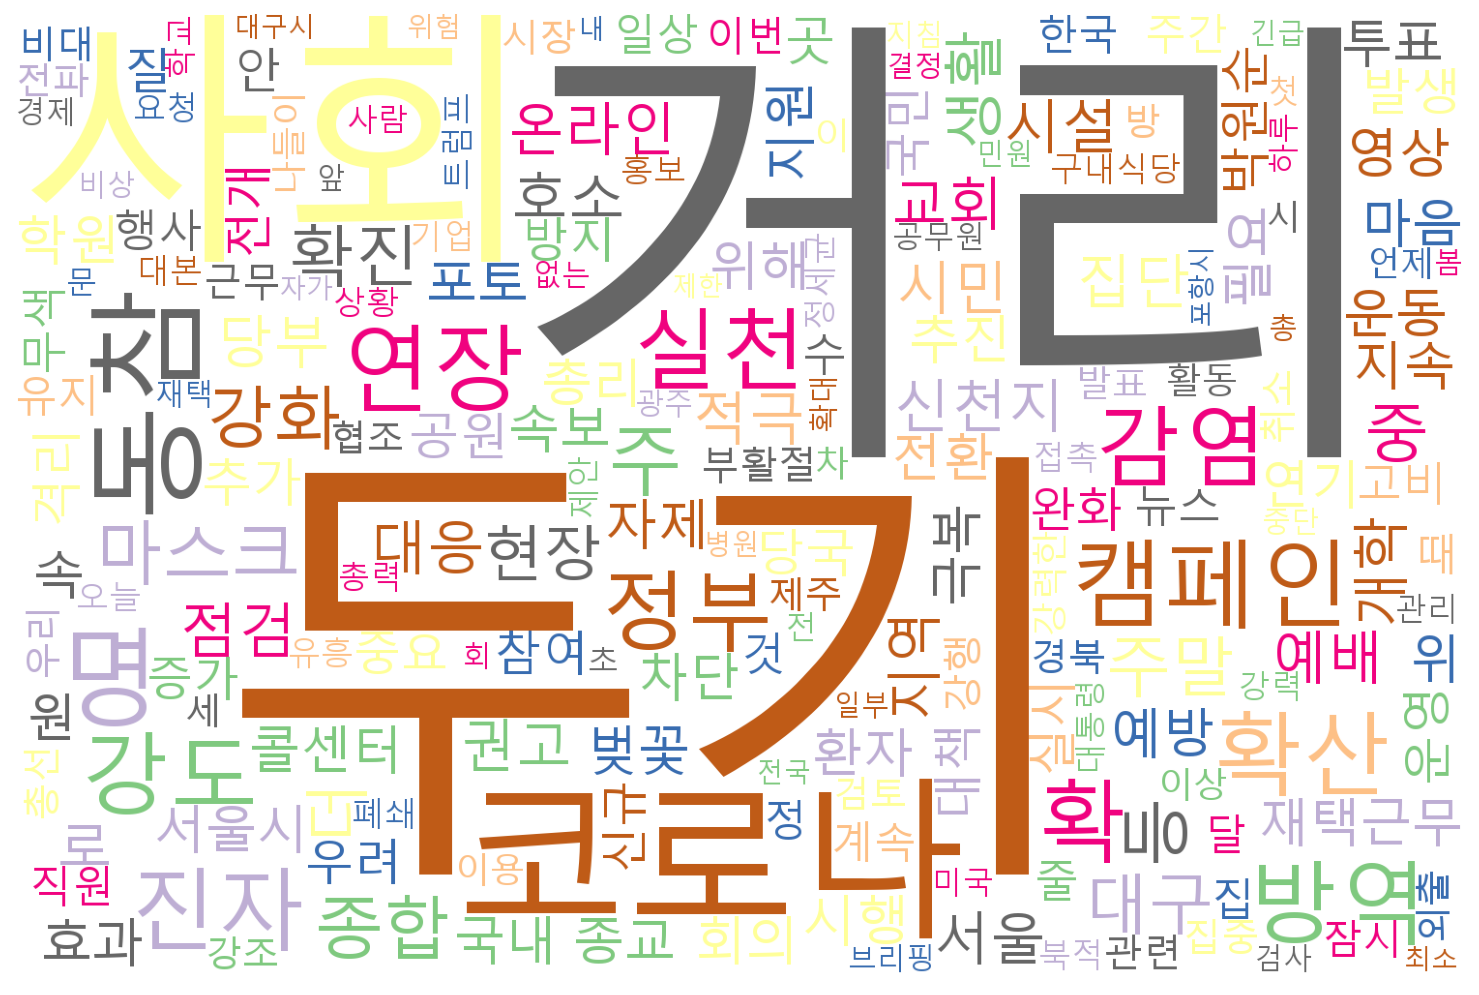

In [171]:
################ word cloud ################
from wordcloud import WordCloud
import matplotlib.pyplot as plt
os.chdir('C:\\Users\\Danah\\Documents\\GitHub\\Data-Science-for-COVID-19\\Naver_News_keyword_Crawling\\wordcloud_img\\')

%matplotlib inline
import matplotlib
from IPython.display import set_matplotlib_formats
matplotlib.rc('font',family = 'Malgun Gothic')
set_matplotlib_formats('retina')
matplotlib.rc('axes',unicode_minus = False)

wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='white',colormap = "Accent_r", width=1500, height=1000).generate_from_frequencies(title_count)


fig = plt.figure(1,figsize=(13, 13))
fig = plt.axis('off')
plt.imshow(wordcloud)

In [ ]:
wordcloud.to_file("img.png")
plt.close()